<a href="https://colab.research.google.com/github/BRIDEBENSON/internship-technovia/blob/main/data_analysis_for_technovia_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/TripData.csv'
trip_data = pd.read_csv(file_path)

# Convert Travel Time to a numeric format (in seconds)
trip_data['Travel Time (seconds)'] = pd.to_timedelta(trip_data['Travel Time']).dt.total_seconds()

# Group the data by Pilot Code and calculate the average travel time and distance
pilot_efficiency = trip_data.groupby('Pilot Code').agg(
    average_travel_time=('Travel Time (seconds)', 'mean'),
    average_distance=('Distance', 'mean')
).reset_index()

# Display the pilot efficiency data
print(pilot_efficiency)


    Pilot Code  average_travel_time  average_distance
0         1017           748.846918          2.352907
1         1022           369.353093          1.619080
2         1023           394.015782          1.735792
3         1048           617.896247          2.617857
4         1055           523.045242          2.560112
5         1108           709.856502          2.922704
6         1112           612.087379          3.084990
7         1115           367.270463          1.493614
8         1116           504.238450          1.684098
9         1149           492.680000          2.695249
10        1150           443.285366          2.383507
11        1152           503.868827          2.481571
12        1181           557.200000          2.127586
13        1226           507.658307          2.855194
14        1227           539.646204          2.527254
15        1236           461.713542          2.368734
16        1237           537.347079          2.428684
17        1265           542

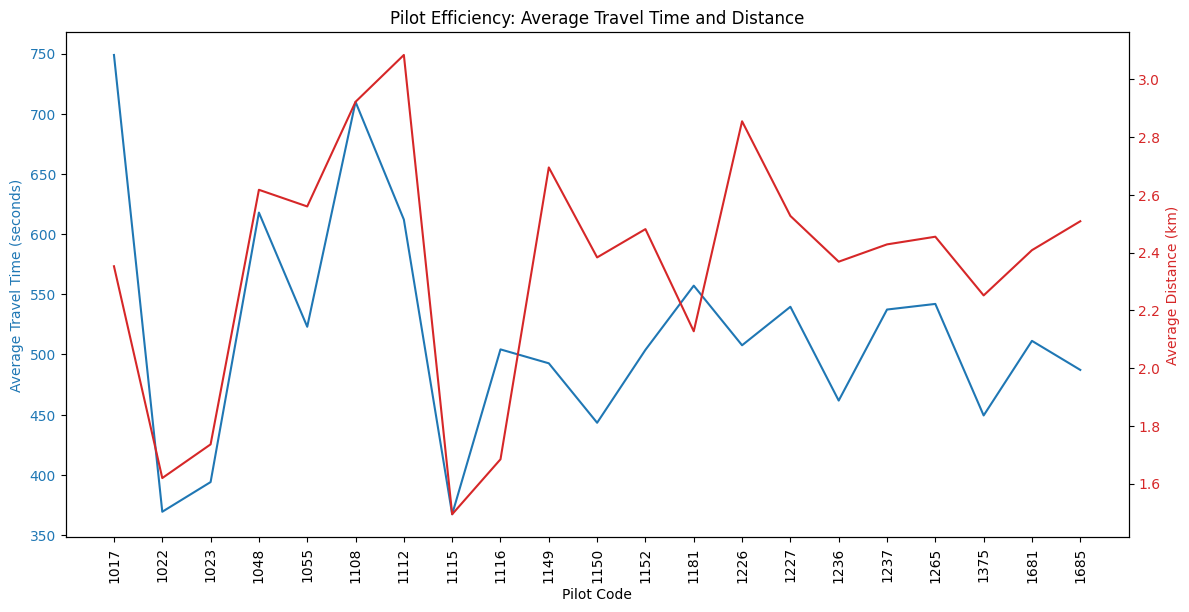

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/TripData.csv'
trip_data = pd.read_csv(file_path)

# Convert Travel Time to a numeric format (in seconds)
trip_data['Travel Time (seconds)'] = pd.to_timedelta(trip_data['Travel Time']).dt.total_seconds()

# Group the data by Pilot Code and calculate the average travel time and distance
pilot_efficiency = trip_data.groupby('Pilot Code').agg(
    average_travel_time=('Travel Time (seconds)', 'mean'),
    average_distance=('Distance', 'mean')
).reset_index()

# Sort by Pilot Code for better visualization
pilot_efficiency = pilot_efficiency.sort_values('Pilot Code')

# Create x-axis values as a range of integers
x_values = range(len(pilot_efficiency))

# Plot average travel time and distance for each pilot
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Pilot Code')
ax1.set_ylabel('Average Travel Time (seconds)', color=color)
ax1.plot(x_values, pilot_efficiency['average_travel_time'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x_values)
ax1.set_xticklabels(pilot_efficiency['Pilot Code'], rotation=90)  # Set pilot codes as x-axis labels

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Distance (km)', color=color)
ax2.plot(x_values, pilot_efficiency['average_distance'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Pilot Efficiency: Average Travel Time and Distance')
plt.show()


<ipython-input-16-16ccca50d6dc>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


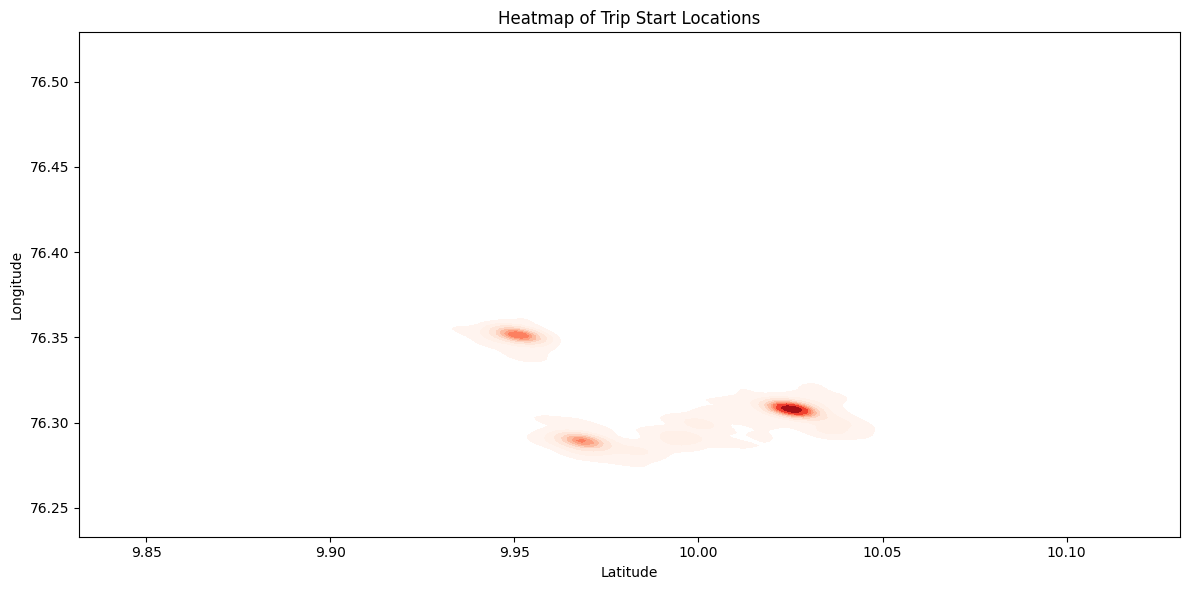

<ipython-input-16-16ccca50d6dc>:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


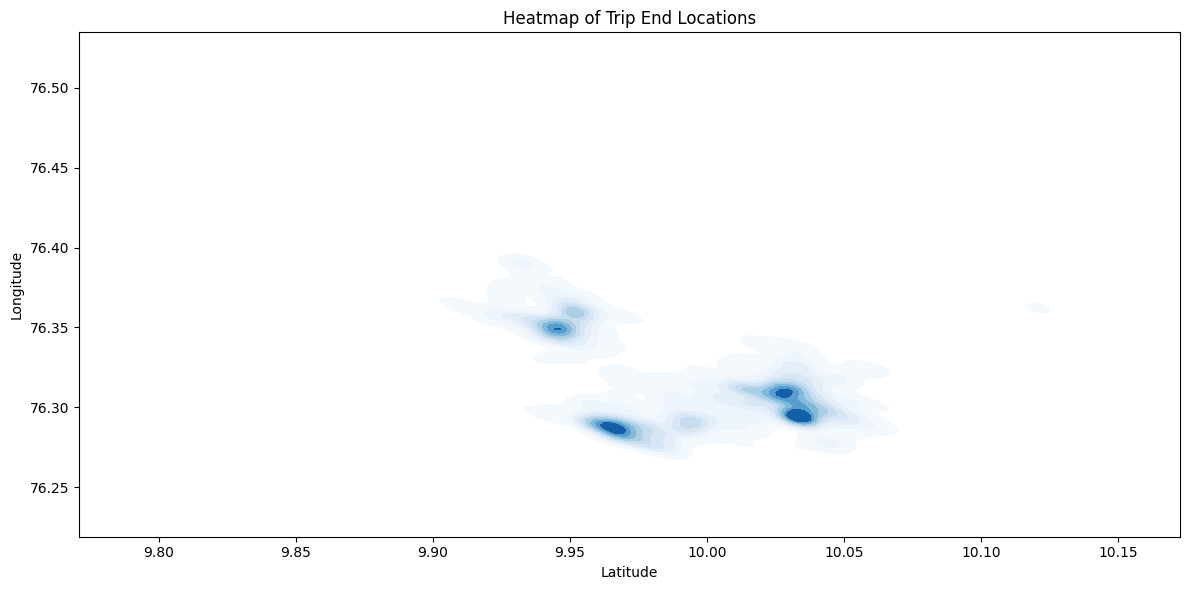

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/TripData.csv'
trip_data = pd.read_csv(file_path)

# Function to split location strings into latitude and longitude
def split_location(location):
    if pd.isna(location):
        return pd.Series([None, None])
    latitude, longitude = map(float, location.split(','))
    return pd.Series([latitude, longitude])

# Apply the function to the start and end locations
trip_data[['Start Latitude', 'Start Longitude']] = trip_data['Start Location'].apply(split_location)
trip_data[['End Latitude', 'End Longitude']] = trip_data['End Location'].apply(split_location)

# Check if the required columns exist in the DataFrame
if 'Start Latitude' in trip_data.columns and 'Start Longitude' in trip_data.columns:
    # Plot heatmap of start locations
    plt.figure(figsize=(12, 6))
    sns.kdeplot(
        x=trip_data['Start Latitude'],
        y=trip_data['Start Longitude'],
        cmap="Reds",
        shade=True,
        bw_adjust=0.5
    )
    plt.title('Heatmap of Trip Start Locations')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.tight_layout()
    plt.show()
else:
    print("The required columns 'Start Latitude' and 'Start Longitude' do not exist in the DataFrame.")

# Check if the required columns exist in the DataFrame
if 'End Latitude' in trip_data.columns and 'End Longitude' in trip_data.columns:
    # Plot heatmap of end locations
    plt.figure(figsize=(12, 6))
    sns.kdeplot(
        x=trip_data['End Latitude'],
        y=trip_data['End Longitude'],
        cmap="Blues",
        shade=True,
        bw_adjust=0.5
    )
    plt.title('Heatmap of Trip End Locations')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.tight_layout()
    plt.show()
else:
    print("The required columns 'End Latitude' and 'End Longitude' do not exist in the DataFrame.")



<ipython-input-9-55a88cf0afa8>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trip_data['Trip Start Time'] = pd.to_datetime(trip_data['Trip Start Time'], errors='coerce')


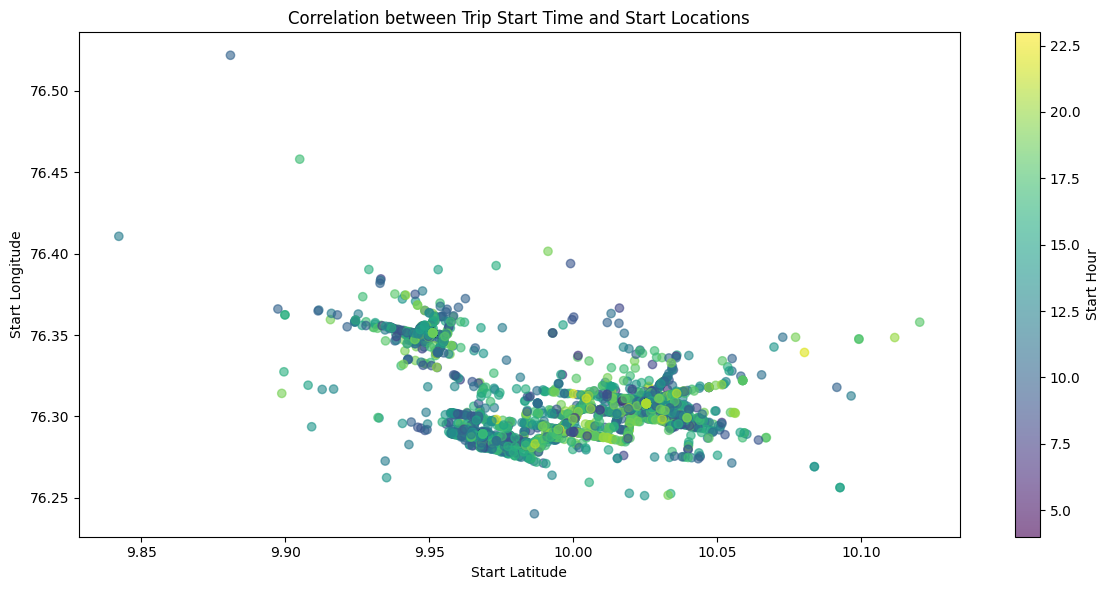

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/TripData.csv'
trip_data = pd.read_csv(file_path)

# Ensure that the necessary columns are present
required_columns = ['Trip Start Time', 'Start Location']
for column in required_columns:
    if column not in trip_data.columns:
        raise KeyError(f"Required column '{column}' not found in the DataFrame")

# Convert 'Start Time' to datetime and extract the hour
trip_data['Trip Start Time'] = pd.to_datetime(trip_data['Trip Start Time'], errors='coerce')
trip_data['Start Hour'] = trip_data['Trip Start Time'].dt.hour

# Ensure that 'Start Location' is properly formatted and not null
if trip_data['Start Location'].isnull().any():
    raise ValueError("Null values found in 'Start Location' column")

# Split the 'Start Location' into 'Start Latitude' and 'Start Longitude'
def split_location(location):
    try:
        latitude, longitude = map(float, location.split(','))
        return pd.Series([latitude, longitude])
    except ValueError:
        return pd.Series([None, None])

trip_data[['Start Latitude', 'Start Longitude']] = trip_data['Start Location'].apply(split_location)

# Ensure that the new columns were created successfully and contain valid data
if trip_data[['Start Latitude', 'Start Longitude']].isnull().any().any():
    raise ValueError("Error in splitting 'Start Location' into 'Start Latitude' and 'Start Longitude'")

# Plot the scatter plot of start locations colored by start hour
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    trip_data['Start Latitude'],
    trip_data['Start Longitude'],
    c=trip_data['Start Hour'],
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(scatter, label='Start Hour')
plt.title('Correlation between Trip Start Time and Start Locations')
plt.xlabel('Start Latitude')
plt.ylabel('Start Longitude')
plt.tight_layout()
plt.show()


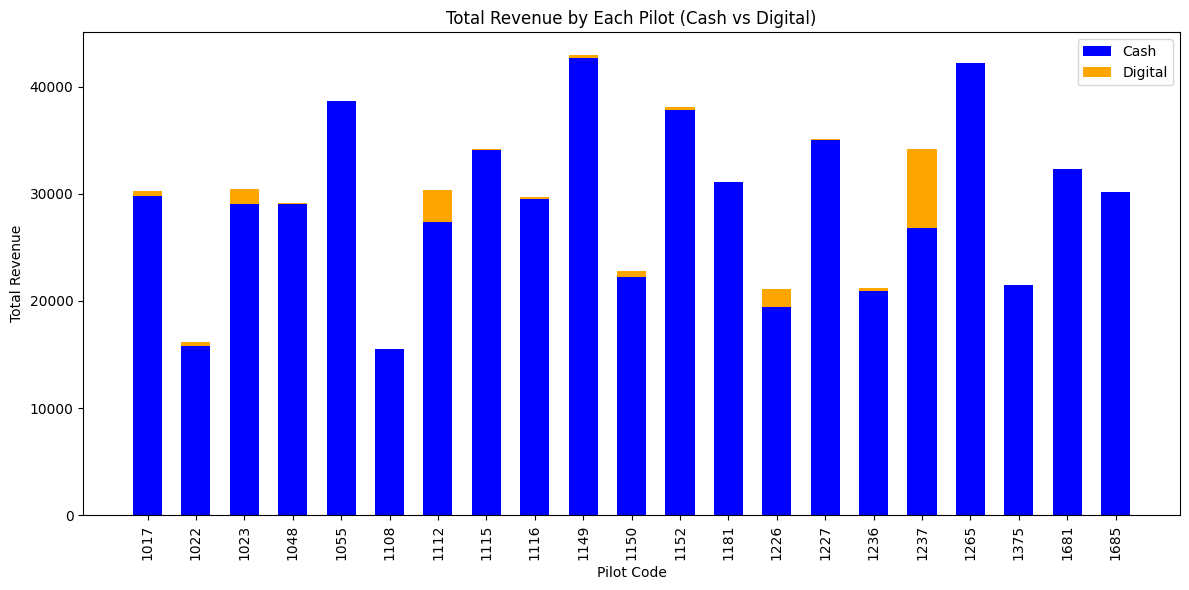

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/TripData.csv'
trip_data = pd.read_csv(file_path)

# Calculate total revenue per pilot for digital and cash payments
revenue_per_pilot = trip_data.groupby(['Pilot Code', 'Payment Type'])['Fare'].sum().unstack().fillna(0)

# Create x-axis values as a range of integers
x_values = range(len(revenue_per_pilot))

# Plot total revenue per pilot as a stacked bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.6

# Plot the bars for digital and cash payments
bottom_values = revenue_per_pilot['Cash'] if 'Cash' in revenue_per_pilot.columns else 0
p1 = plt.bar(x_values, revenue_per_pilot['Cash'], bar_width, label='Cash', color='blue')
p2 = plt.bar(x_values, revenue_per_pilot['Digital'], bar_width, bottom=bottom_values, label='Digital', color='orange')

# Set x-axis labels to be the pilot codes at equal intervals
plt.xticks(x_values, revenue_per_pilot.index, rotation=90)

# Label the axes and title
plt.xlabel('Pilot Code')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Each Pilot (Cash vs Digital)')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


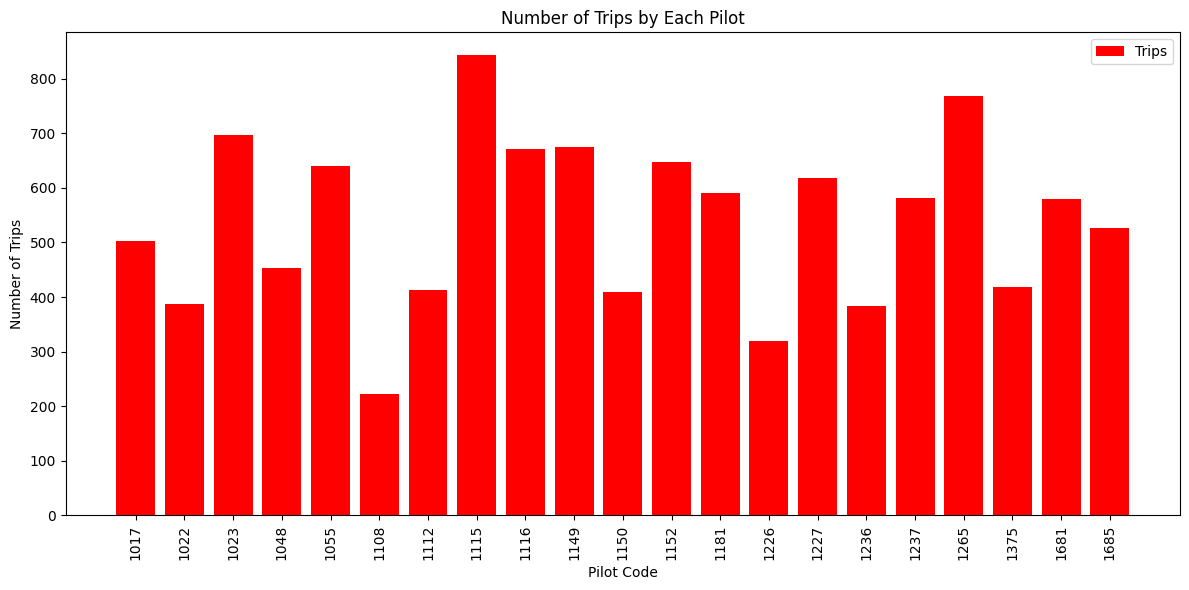

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/TripData.csv'
trip_data = pd.read_csv(file_path)

# Count the number of trips by each pilot
trips_per_pilot = trip_data['Pilot Code'].value_counts().reset_index()
trips_per_pilot.columns = ['Pilot Code', 'Number of Trips']

# Sort by Pilot Code for better visualization
trips_per_pilot = trips_per_pilot.sort_values('Pilot Code')

# Create x-axis values as a range of integers
x_values = range(len(trips_per_pilot))

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(x_values, trips_per_pilot['Number of Trips'], color='red', label='Trips')

# Set x-axis labels to be the pilot codes at equal intervals
plt.xticks(x_values, trips_per_pilot['Pilot Code'], rotation=90)

# Label the axes and title
plt.xlabel('Pilot Code')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Each Pilot')

# Show plot
plt.tight_layout()
plt.legend()
plt.show()
